For a business without any user-item purchase history, a search engine based recommendation system can be designed for users. The product recommendations can be based on textual clustering analysis given in product description.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [5]:
product_descriptions = pd.read_csv('data.csv',encoding='unicode_escape')
product_descriptions.shape

(541909, 8)

In [6]:
product_descriptions = product_descriptions.dropna()

In [7]:
product_descriptions1 = product_descriptions.head(500)

In [8]:
product_descriptions1["Description"].head(10)

0     WHITE HANGING HEART T-LIGHT HOLDER
1                    WHITE METAL LANTERN
2         CREAM CUPID HEARTS COAT HANGER
3    KNITTED UNION FLAG HOT WATER BOTTLE
4         RED WOOLLY HOTTIE WHITE HEART.
5           SET 7 BABUSHKA NESTING BOXES
6      GLASS STAR FROSTED T-LIGHT HOLDER
7                 HAND WARMER UNION JACK
8              HAND WARMER RED POLKA DOT
9          ASSORTED COLOUR BIRD ORNAMENT
Name: Description, dtype: object

In [9]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["Description"])
X1

<500x492 sparse matrix of type '<class 'numpy.float64'>'
	with 2072 stored elements in Compressed Sparse Row format>

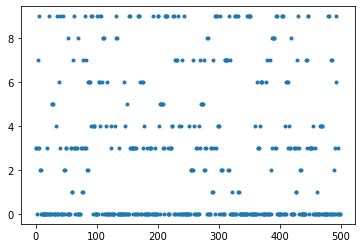

In [10]:
X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

In [11]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

In [12]:
true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print_cluster(i)

Top terms per cluster:
Cluster 0:
 metal
 vintage
 mug
 box
 heart
 lantern
 small
 sign
 bag
 pink
Cluster 1:
 retrospot
 red
 set
 pack
 bag
 parasol
 paper
 72
 edwardian
 jumbo
Cluster 2:
 holder
 light
 white
 heart
 hanging
 wood
 finish
 cabinet
 red
 woolly
Cluster 3:
 hand
 warmer
 design
 cake
 cream
 coat
 jack
 union
 cases
 60
Cluster 4:
 assorted
 colour
 ornament
 retro
 mugs
 coffee
 bird
 magnets
 cones
 fridge
Cluster 5:
 hot
 bottle
 water
 knitted
 flag
 union
 sympathy
 tea
 skull
 scottie
Cluster 6:
 clock
 bakelike
 alarm
 green
 wall
 diner
 red
 ivory
 orange
 blue
Cluster 7:
 set
 polkadot
 boxes
 nesting
 babushka
 flying
 ducks
 cookie
 pink
 coloured
Cluster 8:
 frame
 wooden
 photo
 white
 antique
 cornice
 picture
 finish
 line
 clip
Cluster 9:
 jam
 making
 set
 candles
 printed
 jars
 scented
 homemade
 jar
 celebration


C:\Users\upsho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [13]:
def show_recommendations(product):
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    print_cluster(prediction[0])

In [14]:
show_recommendations("cream")

Cluster 3:
 hand
 warmer
 design
 cake
 cream
 coat
 jack
 union
 cases
 60


In [15]:
from sklearn.metrics import accuracy_score
import joblib

In [16]:
joblib.dump(model,'ml_recommendor_model.joblib')

['ml_recommendor_model.joblib']

In [17]:
print(print_cluster(i))


Cluster 9:
 jam
 making
 set
 candles
 printed
 jars
 scented
 homemade
 jar
 celebration
None
